# 시작전 설정


In [1]:
import seaborn as sns 
#수업 시간 전 설정 
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import pandas as pd 

#한글 설정
plt.rc('font',family='HYHeadLine-Medium')
plt.rc("axes",unicode_minus =False) # y축 

#경고 메세지 안 보이게
import warnings
warnings.filterwarnings(action='ignore')
#warnings.filterwarnings(action='default')

In [2]:
# 컬러설정
colors = ["#fe7054", "#fec434",'#da87ff','#ff9cd3' ]
customPalette = sns.set_palette(sns.color_palette(colors))

# 데이터 로드

## 범죄원부 로우데이터 로드

In [3]:
df_data = pd.read_excel('t_data/population/(필요)지역별_나이별_인구.xlsx')
df_data.head()

,광역_도,시_군_구,시구only,경찰서,연령,항목,합계: 2017년,합계: 2018년,합계: 2019년
0,강원,강릉시,강릉시,강원강릉경찰서,0~6,총인구_남자(명),5104,4820,4570
1,강원,강릉시,강릉시,강원강릉경찰서,0~6,총인구_여자(명),4785,4489,4292
2,강원,강릉시,강릉시,강원강릉경찰서,13~15,총인구_남자(명),3189,2957,2859
3,강원,강릉시,강릉시,강원강릉경찰서,13~15,총인구_여자(명),2887,2756,2566
4,강원,강릉시,강릉시,강원강릉경찰서,16~20,총인구_남자(명),8574,8316,7907


## 데이터 확인 및 결측치 확인

In [4]:
df_data.shape

(4500, 9)

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   광역_도       4500 non-null   object
 1   시_군_구      4500 non-null   object
 2   시구only     4500 non-null   object
 3   경찰서        3978 non-null   object
 4   연령         4500 non-null   object
 5   항목         4500 non-null   object
 6   합계: 2017년  4500 non-null   int64 
 7   합계: 2018년  4500 non-null   int64 
 8   합계: 2019년  4500 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 316.5+ KB


In [6]:
df_data.isnull().sum()

광역_도           0
시_군_구          0
시구only         0
경찰서          522
연령             0
항목             0
합계: 2017년      0
합계: 2018년      0
합계: 2019년      0
dtype: int64

# 전처리

## 분석에 필요한 컬럼만 가져오기

In [7]:
needed_data=df_data.loc[:, ['광역_도','연령','항목','합계: 2017년','합계: 2018년','합계: 2019년']]
needed_data.head()

,광역_도,연령,항목,합계: 2017년,합계: 2018년,합계: 2019년
0,강원,0~6,총인구_남자(명),5104,4820,4570
1,강원,0~6,총인구_여자(명),4785,4489,4292
2,강원,13~15,총인구_남자(명),3189,2957,2859
3,강원,13~15,총인구_여자(명),2887,2756,2566
4,강원,16~20,총인구_남자(명),8574,8316,7907


In [8]:
needed_data2017=needed_data.iloc[:,[0,1,2,3]]
needed_data2018=needed_data.iloc[:,[0,1,2,4]]
needed_data2019=needed_data.iloc[:,[0,1,2,5]]

In [9]:
needed_data2019

,광역_도,연령,항목,합계: 2019년
0,강원,0~6,총인구_남자(명),4570
1,강원,0~6,총인구_여자(명),4292
2,강원,13~15,총인구_남자(명),2859
3,강원,13~15,총인구_여자(명),2566
4,강원,16~20,총인구_남자(명),7907
...,...,...,...,...
4495,충남,51~60,총인구_여자(명),19386
4496,충남,61~,총인구_남자(명),19373
4497,충남,61~,총인구_여자(명),23403
4498,충남,7~12,총인구_남자(명),14400


## 컬럼 이름 바꾸기

In [10]:
needed_data2019_2 = needed_data2019.pivot_table(index='광역_도', columns=['연령'], values='합계: 2019년')

# 시각화

## 2019년도 지역별 범죄 건수

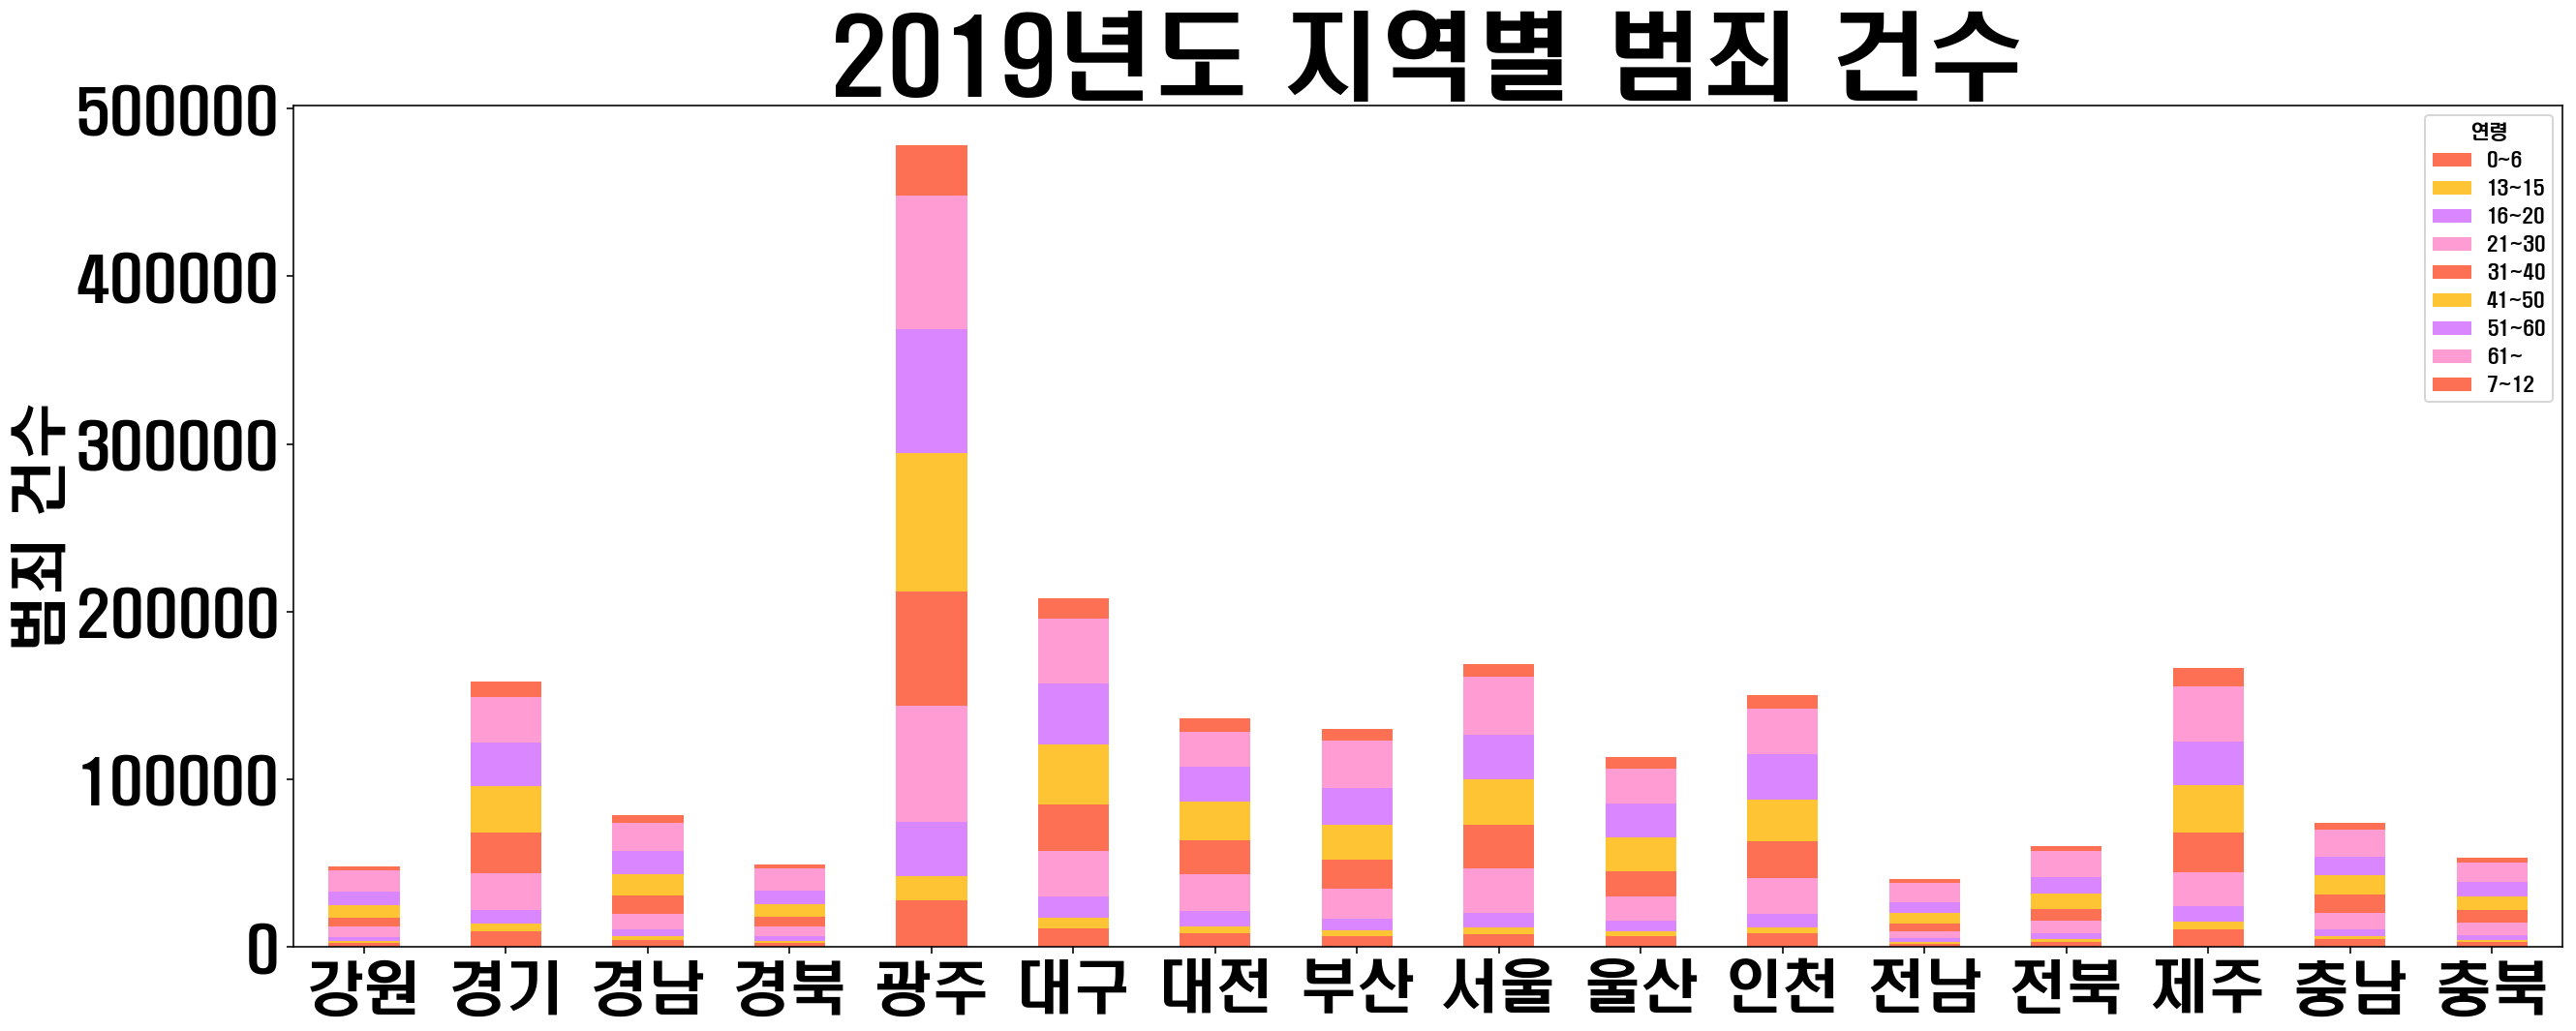

In [45]:
colors = ["#fe7054", "#fec434",'#da87ff','#ff9cd3' ]

plt.rcParams["figure.figsize"] = (21,8)
z= needed_data2019_2.plot(kind='bar',stacked=True)

z.set_xlabel('',fontsize=25)
z.set_ylabel('범죄 건수',fontsize=30)

plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.xticks(rotation = 0 )
plt.rc('font',family='HYHeadLine-Medium')
plt.title('2019년도 지역별 범죄 건수',fontsize=50)



plt.savefig('2019년도 지역별 범죄 건수.png')


## 2019년도 지역별 범죄 건수

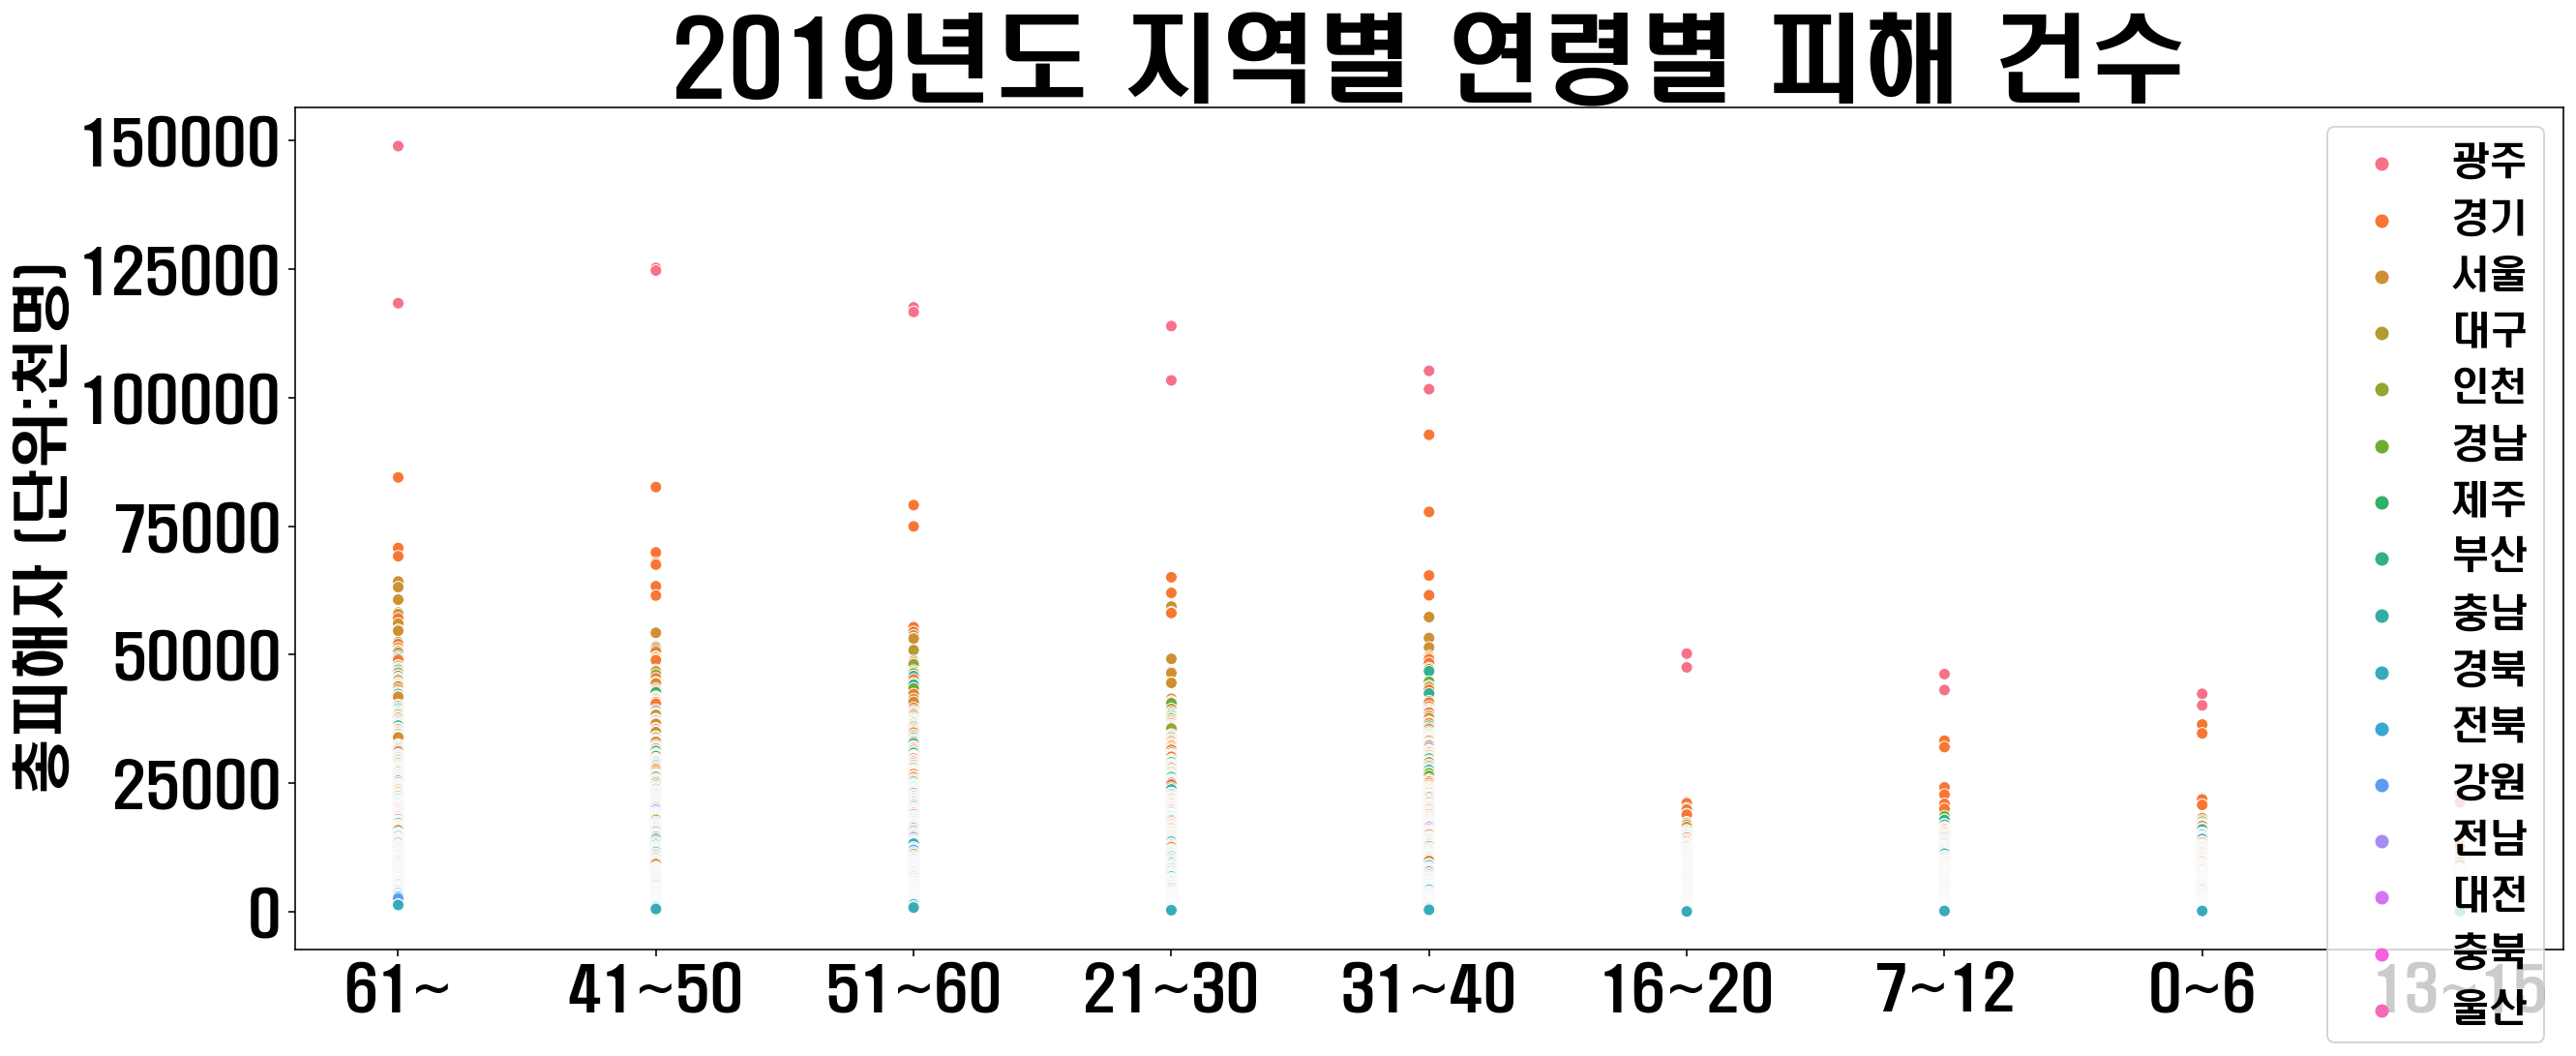

In [49]:
plt.figure(figsize=(21,8))
plt.title('2019년도 지역별 연령별 피해 건수',fontsize=50)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

b=sns.scatterplot(x="연령", y="합계: 2019년", hue="광역_도",
            data=needed_data2019.sort_values('합계: 2019년', ascending=False))
b.legend(bbox_to_anchor= (1.03, 1) );
plt.legend( prop={'size': 20})
b.set_xlabel('', fontsize=25)
b.set_ylabel('총피해자 (단위:천명)', fontsize=30)
plt.savefig('2019년도 지역별 연령별 피해 건수.png')

## 2019년도 남여 총 피해 건수

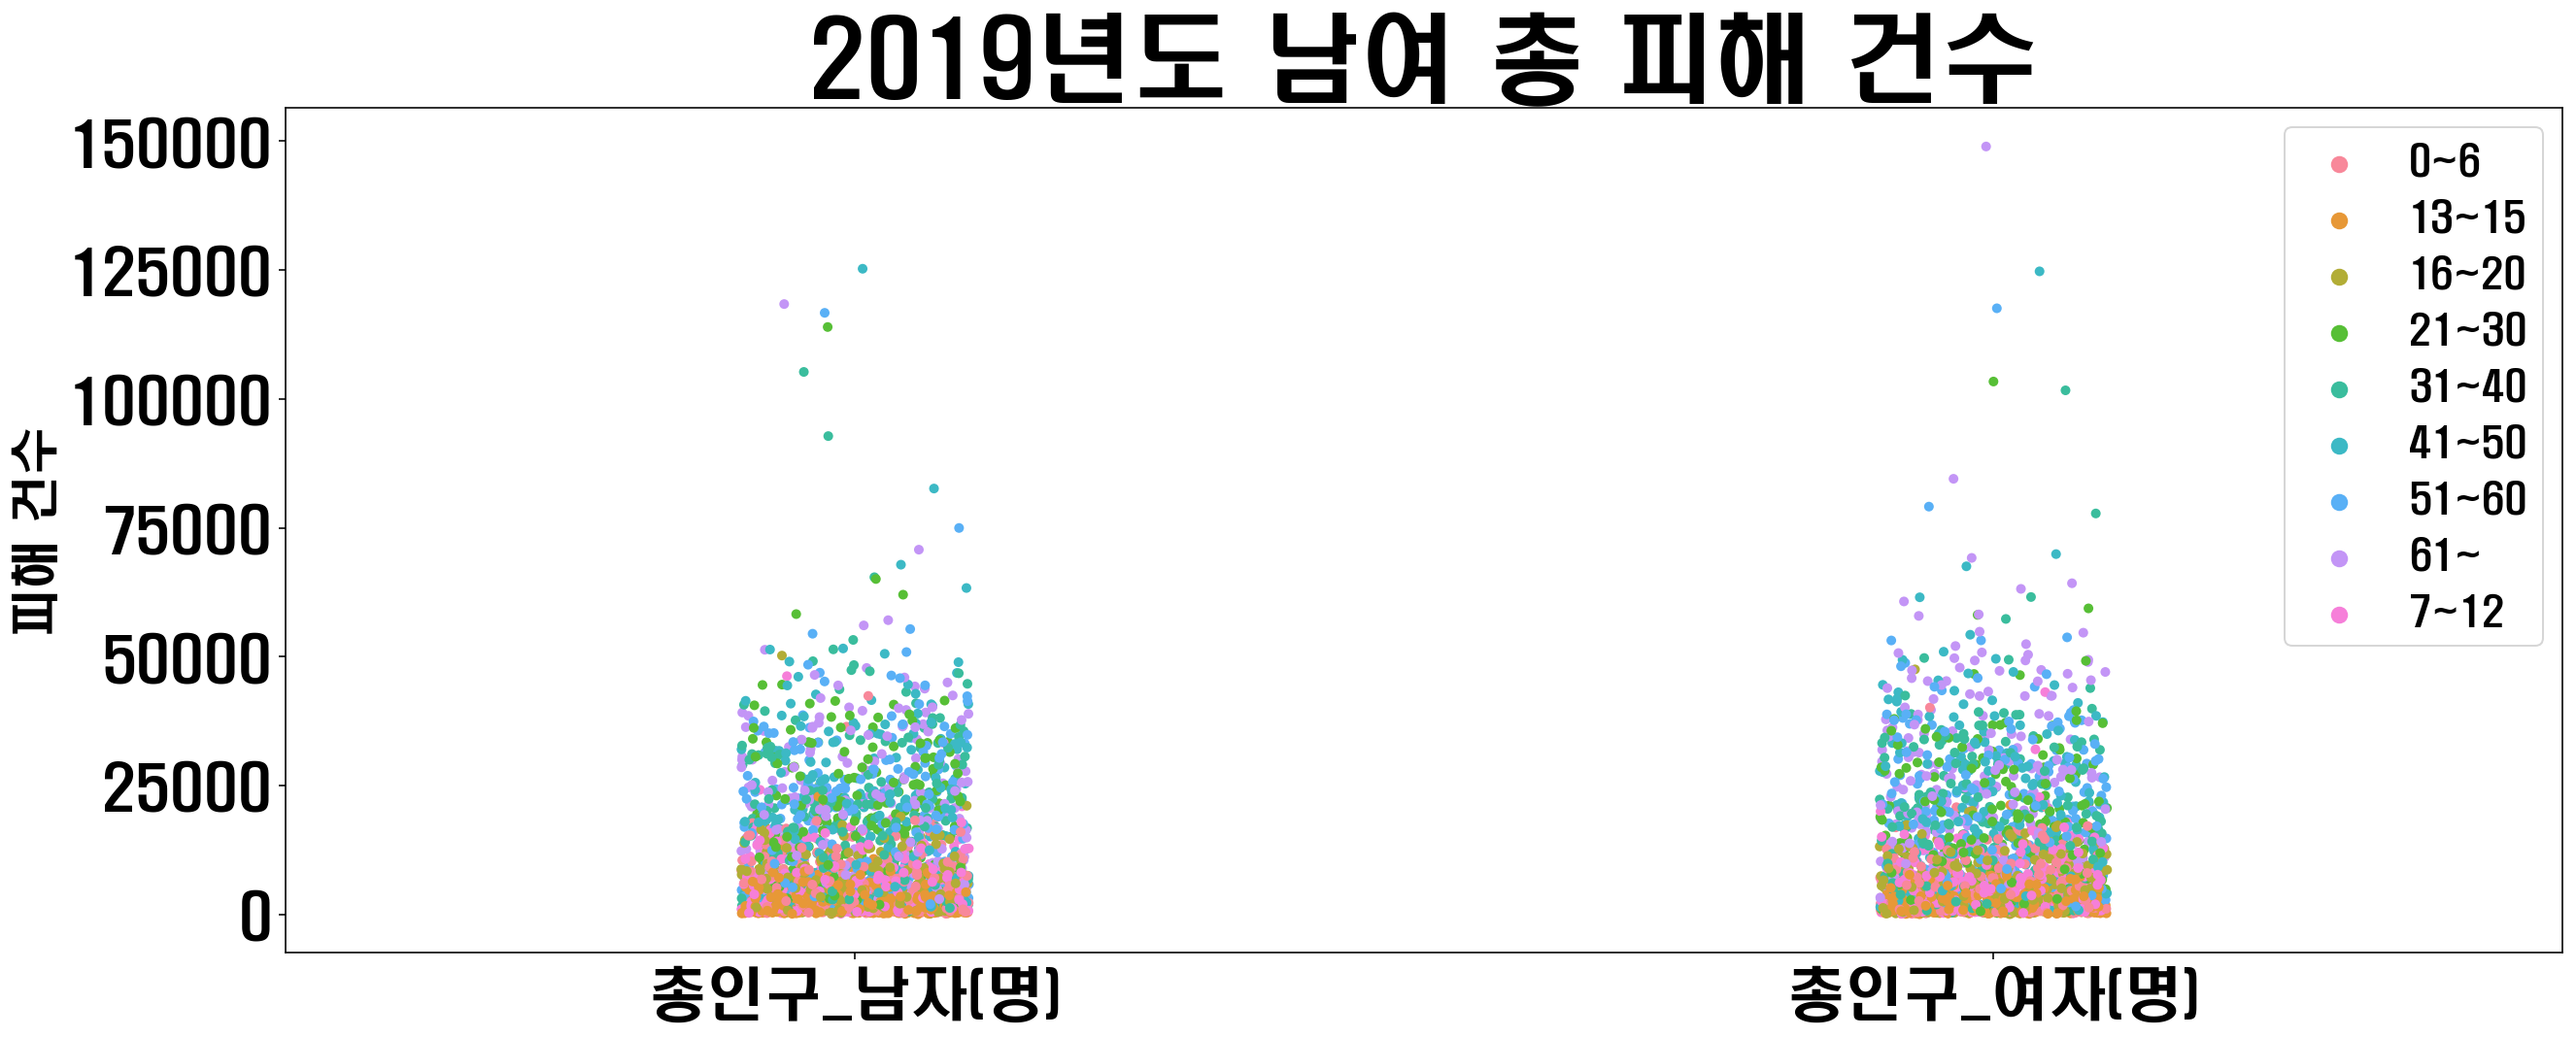

In [13]:
plt.figure(figsize=(21,8))
plt.title('2019년도 남여 총 피해 건수',fontsize=50)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
c=sns.stripplot(x='항목',y='합계: 2019년', data=needed_data2019,hue='연령')

plt.legend( prop={'size': 20})
c.set_xlabel('', fontsize=25)
c.set_ylabel('피해 건수', fontsize=25)
plt.savefig('2019년도 남여 총 피해 건수.png')

# 2019년도 현황분석 (연령)

## 필요 데이터 뽑기

In [14]:
#2019년도 아동   (0-12세)
data_19_child=needed_data2019.loc[     (needed_data2019['연령']=='0~6') | (needed_data2019['연령']=='7~12')  ].groupby('광역_도').sum()
data_19_child=data_19_child.reset_index() 
data_19_child.columns =['광역_도','2019년도 아동 피해자 (0-12세 이하)']
data_19_child.head()

#2019년도 청소년  (13-19세)
data_19_teen=needed_data2019.loc[     (needed_data2019['연령']=='13~15') | (needed_data2019['연령']=='16~20')  ].groupby('광역_도').sum()
data_19_teen=data_19_teen.reset_index() 
data_19_teen.columns =['광역_도','2019년도 청소년 피해자 (13-20세 이하)']
data_19_teen_df=data_19_teen.iloc[:,1]

#2019년도 2030  
data_19_2030=needed_data2019.loc[     (needed_data2019['연령']=='21~30') | (needed_data2019['연령']=='31~40')  ].groupby('광역_도').sum()
data_19_2030=data_19_2030.reset_index() 
data_19_2030.columns =['광역_도','2019년도 2030 피해자 (21-40세 이하)']
data_19_2030_df=data_19_2030.iloc[:,1]

#2019년도 4050
data_19_4050=needed_data2019.loc[     (needed_data2019['연령']=='41~50') | (needed_data2019['연령']=='51~60')  ].groupby('광역_도').sum()
data_19_4050=data_19_4050.reset_index() 
data_19_4050.columns =['광역_도','2019년도 4050 피해자 (40-60세 이하)']
data_19_4050_df=data_19_4050.iloc[:,1]

#2019년도 60세 이상 
data_19_60up=needed_data2019.loc[     (needed_data2019['연령']=='61~') ].groupby('광역_도').sum()
data_19_60up=data_19_60up.reset_index() 
data_19_60up.columns =['광역_도','2019년도 60세 초과 피해자 (60세 초과)']
data_19_60up.head()
data_19_60up_df=data_19_60up.iloc[:,1]

In [15]:
# 2019년도 각 연령층 concat
data_19_totalAge=pd.concat([ data_19_child, data_19_teen_df,data_19_2030_df, data_19_4050_df, data_19_60up_df ],axis=1)
data_19_totalAge.head()

,광역_도,2019년도 아동 피해자 (0-12세 이하),2019년도 청소년 피해자 (13-20세 이하),2019년도 2030 피해자 (21-40세 이하),2019년도 4050 피해자 (40-60세 이하),2019년도 60세 초과 피해자 (60세 초과)
0,강원,183829,159274,456800,622000,501650
1,경기,1573654,1074220,3888681,4471979,2292366
2,경남,378077,257817,849027,1103274,708127
3,경북,209176,168649,521699,681843,584723
4,광주,231548,187179,550676,624901,318736


In [16]:
data_19_totalAge.shape

(16, 6)

In [17]:
data_19_totalAge.describe()

,2019년도 아동 피해자 (0-12세 이하),2019년도 청소년 피해자 (13-20세 이하),2019년도 2030 피해자 (21-40세 이하),2019년도 4050 피해자 (40-60세 이하),2019년도 60세 초과 피해자 (60세 초과)
count,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
mean,3.563824e+05,2.668869e+05,9.334591e+05,1.087402e+06,6.851782e+05
std,4.165230e+05,2.975690e+05,1.152765e+06,1.267797e+06,7.235747e+05
min,2.577500e+04,1.874600e+04,5.942200e+04,8.025400e+04,4.230400e+04
25%,1.404178e+05,1.118400e+05,3.456882e+05,4.249625e+05,2.633648e+05
50%,1.896150e+05,1.582325e+05,4.865700e+05,6.216175e+05,4.831020e+05
75%,3.224022e+05,2.253532e+05,7.357275e+05,8.568232e+05,6.155740e+05
max,1.573654e+06,1.074220e+06,3.888681e+06,4.471979e+06,2.292366e+06


In [18]:
data_19_totalAge_df=data_19_totalAge.set_index('광역_도') 
data_19_totalAge_df.head()

,2019년도 아동 피해자 (0-12세 이하),2019년도 청소년 피해자 (13-20세 이하),2019년도 2030 피해자 (21-40세 이하),2019년도 4050 피해자 (40-60세 이하),2019년도 60세 초과 피해자 (60세 초과)
광역_도,,,,,
강원,183829,159274,456800,622000,501650
경기,1573654,1074220,3888681,4471979,2292366
경남,378077,257817,849027,1103274,708127
경북,209176,168649,521699,681843,584723
광주,231548,187179,550676,624901,318736


In [19]:
data_19_totalAge_df['2019년도 아동 피해자 (0-12세 이하)'] = round(data_19_totalAge_df['2019년도 아동 피해자 (0-12세 이하)']/1000)
data_19_totalAge_df['2019년도 청소년 피해자 (13-20세 이하)'] = round(data_19_totalAge_df['2019년도 청소년 피해자 (13-20세 이하)']/1000)


data_19_totalAge_df['2019년도 2030 피해자 (21-40세 이하)'] = round(data_19_totalAge_df['2019년도 2030 피해자 (21-40세 이하)']/1000)
data_19_totalAge_df['2019년도 4050 피해자 (40-60세 이하)'] = round(data_19_totalAge_df['2019년도 4050 피해자 (40-60세 이하)']/1000)

data_19_totalAge_df['2019년도 60세 초과 피해자 (60세 초과)'] = round(data_19_totalAge_df['2019년도 60세 초과 피해자 (60세 초과)']/1000)

In [20]:
data_19_totalAge_df.head()

,2019년도 아동 피해자 (0-12세 이하),2019년도 청소년 피해자 (13-20세 이하),2019년도 2030 피해자 (21-40세 이하),2019년도 4050 피해자 (40-60세 이하),2019년도 60세 초과 피해자 (60세 초과)
광역_도,,,,,
강원,184.0,159.0,457.0,622.0,502.0
경기,1574.0,1074.0,3889.0,4472.0,2292.0
경남,378.0,258.0,849.0,1103.0,708.0
경북,209.0,169.0,522.0,682.0,585.0
광주,232.0,187.0,551.0,625.0,319.0


## 시각화

<Figure size 1512x576 with 0 Axes>

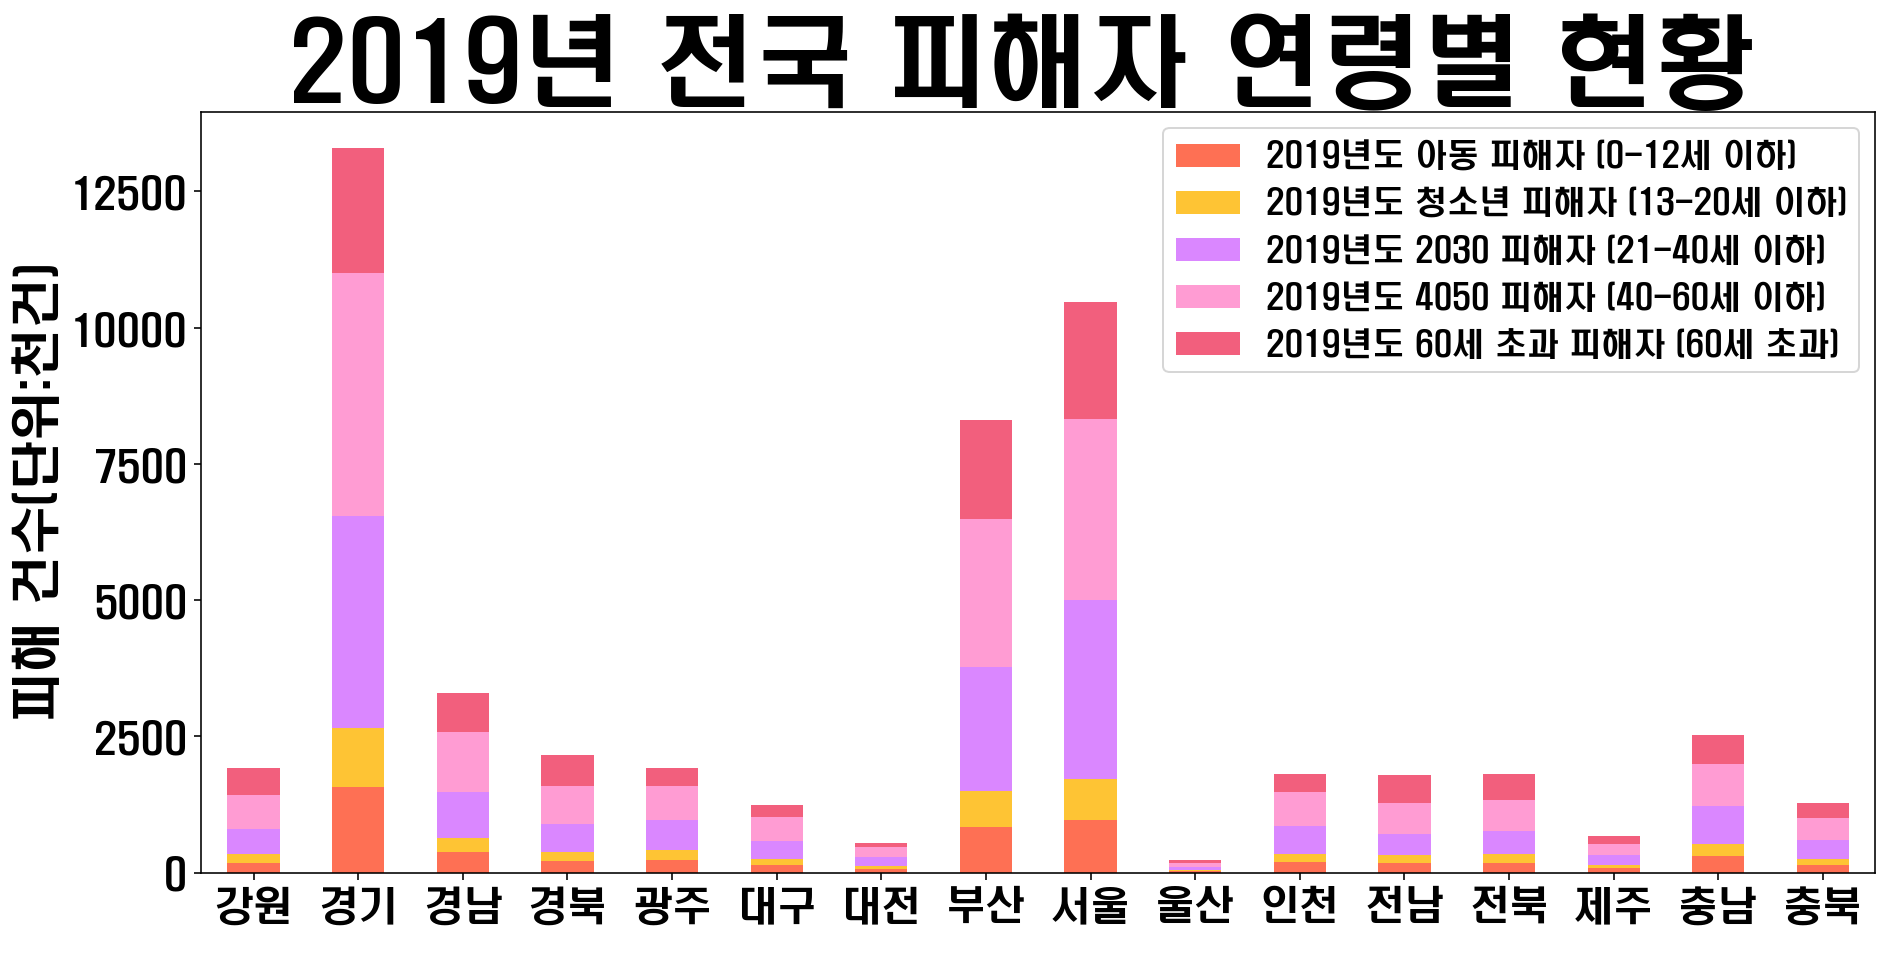

In [21]:
colors = ["#fe7054", "#fec434",'#da87ff','#ff9cd3','grey' ]

plt.figure(figsize=(21,8))
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
ax2=data_19_totalAge_df.plot(kind='bar',figsize=(15,7),fontsize=20,stacked=True, color=["#fe7054", "#fec434",'#da87ff','#ff9cd3','#f25f7d' ])
ax2.grid(False)
plt.legend(loc=2, borderaxespad=0.)
plt.legend(fontsize=16) 
plt.xticks(rotation = 0 )
plt.title('2019년 전국 피해자 연령별 현황 ', fontsize=50)
plt.xlabel(' ')
plt.ylabel('피해 건수(단위:천건)', fontsize=25)
plt.savefig('2019년 전국 피해자 연령별 현황')

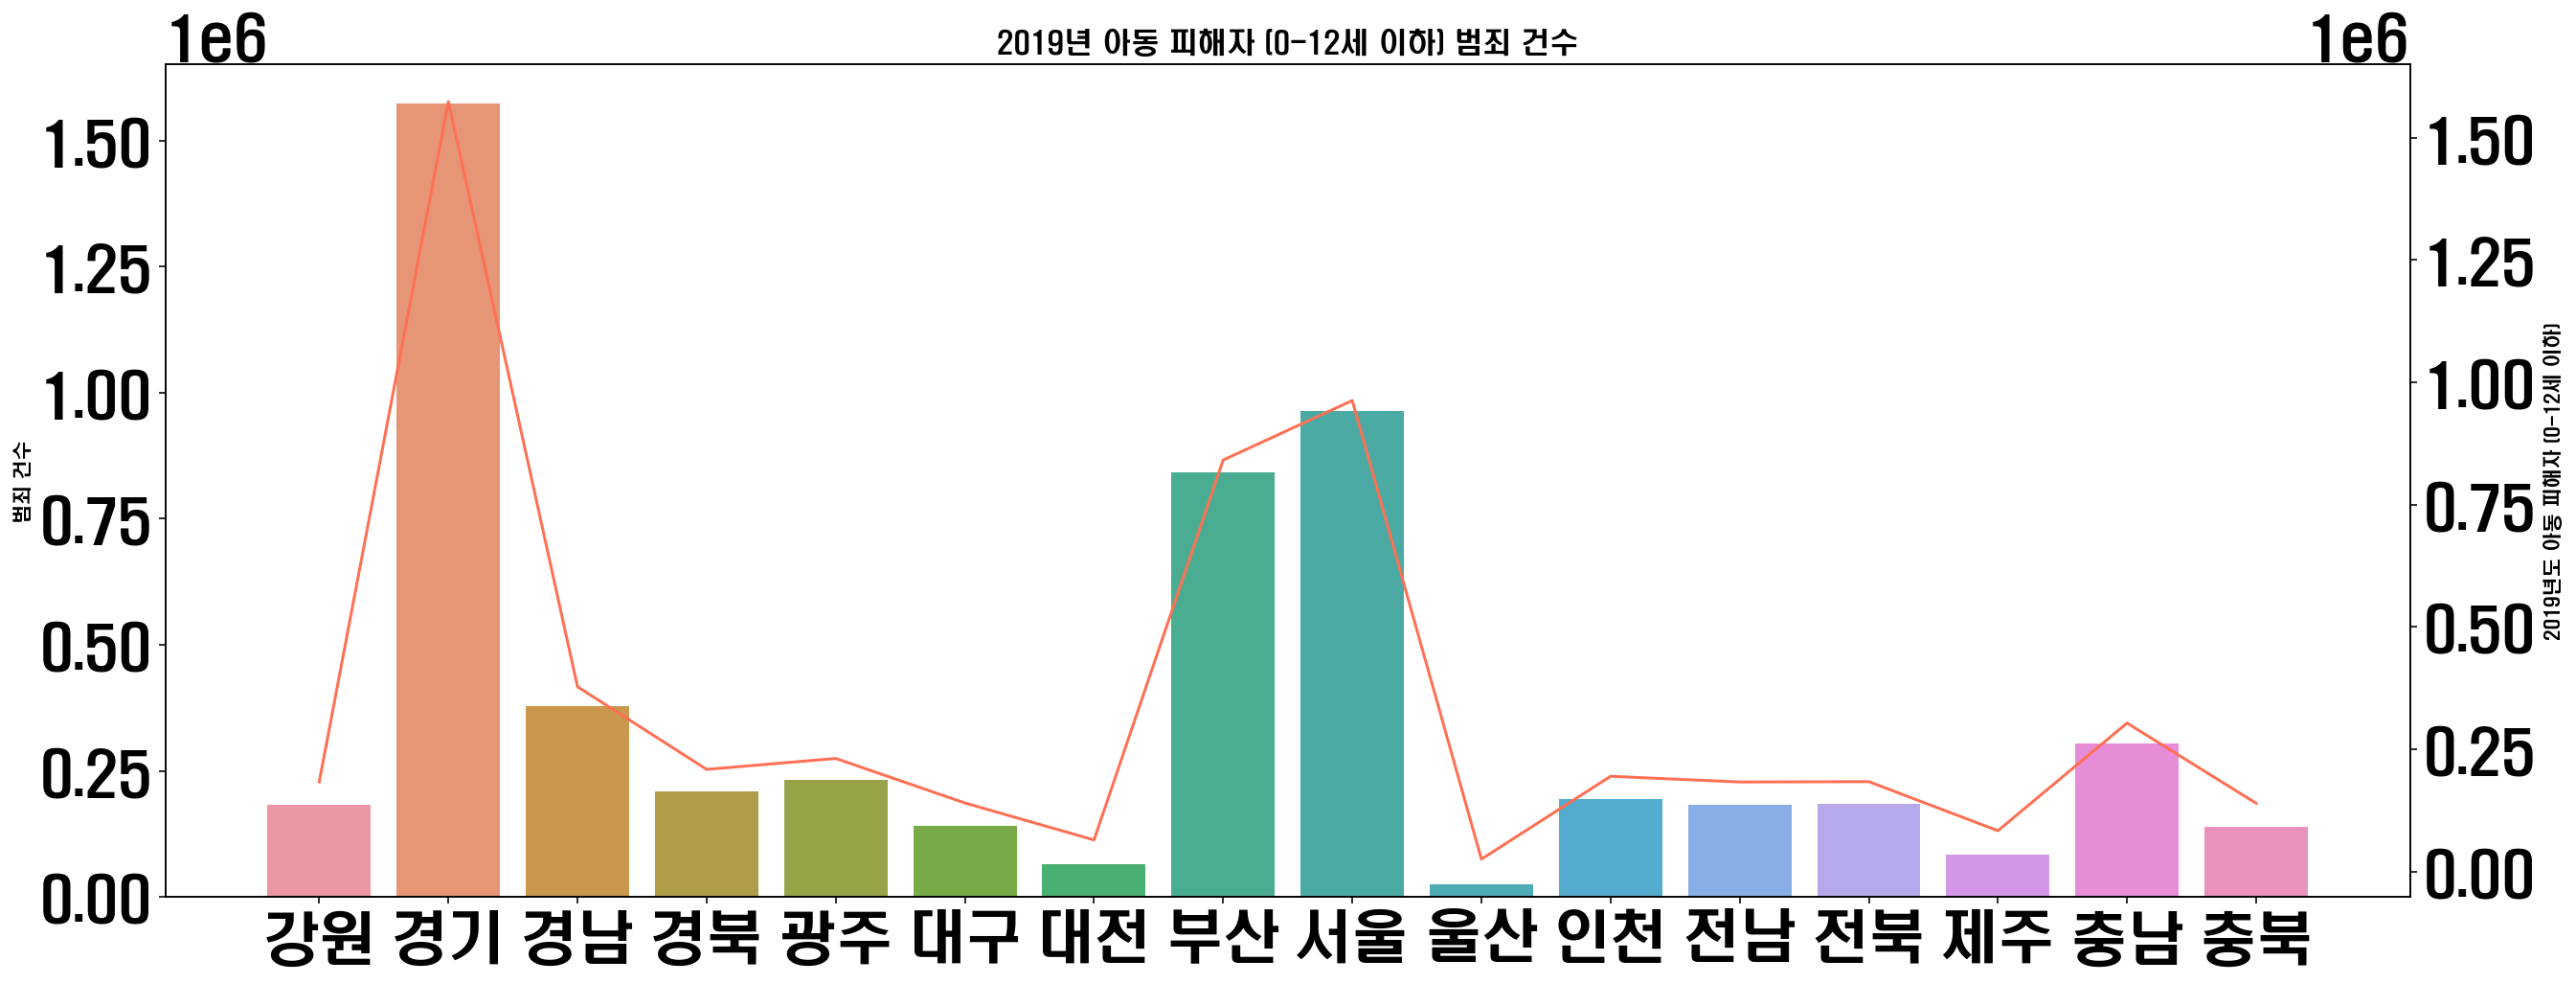

In [22]:
#2019년도 아동 피해자 
fig, ax_child= plt.subplots()
ax_child_2=ax_child.twinx()

sns.barplot(x="광역_도",y="2019년도 아동 피해자 (0-12세 이하)",data=data_19_child, ax= ax_child)
sns.lineplot(x="광역_도",y="2019년도 아동 피해자 (0-12세 이하)",data=data_19_child, ax= ax_child_2)

ax_child.set(xlabel=" ", ylabel = "범죄 건수")
plt.title('2019년 아동 피해자 (0-12세 이하) 범죄 건수' ,fontsize=15)
plt.show()

# 2019년도 현황분석 (성별)

In [23]:
needed_data2019.head()

,광역_도,연령,항목,합계: 2019년
0,강원,0~6,총인구_남자(명),4570
1,강원,0~6,총인구_여자(명),4292
2,강원,13~15,총인구_남자(명),2859
3,강원,13~15,총인구_여자(명),2566
4,강원,16~20,총인구_남자(명),7907


In [24]:
#2019년도 남
data_19_male=needed_data2019.loc[     (needed_data2019['항목']=='총인구_남자(명)')  ].groupby('광역_도').sum()
data_19_male=data_19_male.reset_index() 
data_19_male.columns =['광역_도','피해 건수(남)']


#2019년도 여
data_19_female=needed_data2019.loc[     (needed_data2019['항목']=='총인구_여자(명)')  ].groupby('광역_도').sum()
data_19_female=data_19_female.reset_index() 
data_19_female.columns =['광역_도','피해 건수(여)']
data_19_female_df=data_19_female.iloc[:,1]

# 2019년도 각 연령층 merge
data_19_gender=pd.merge(data_19_male, data_19_female ,on='광역_도')
data_19_gender.head()

,광역_도,피해 건수(남),피해 건수(여)
0,강원,972842,950711
1,경기,6740448,6560452
2,경남,1678025,1618297
3,경북,1097530,1068560
4,광주,955766,957274


## index변경

In [25]:
data_19_gender=data_19_gender.set_index('광역_도')

## 천단위로 변경

In [26]:
data_19_gender['피해 건수(남)']= round(data_19_gender['피해 건수(남)']/1000)
data_19_gender['피해 건수(여)']= round(data_19_gender['피해 건수(여)']/1000)

In [27]:
data_19_gender.head()

,피해 건수(남),피해 건수(여)
광역_도,,
강원,973.0,951.0
경기,6740.0,6560.0
경남,1678.0,1618.0
경북,1098.0,1069.0
광주,956.0,957.0


## 시각화

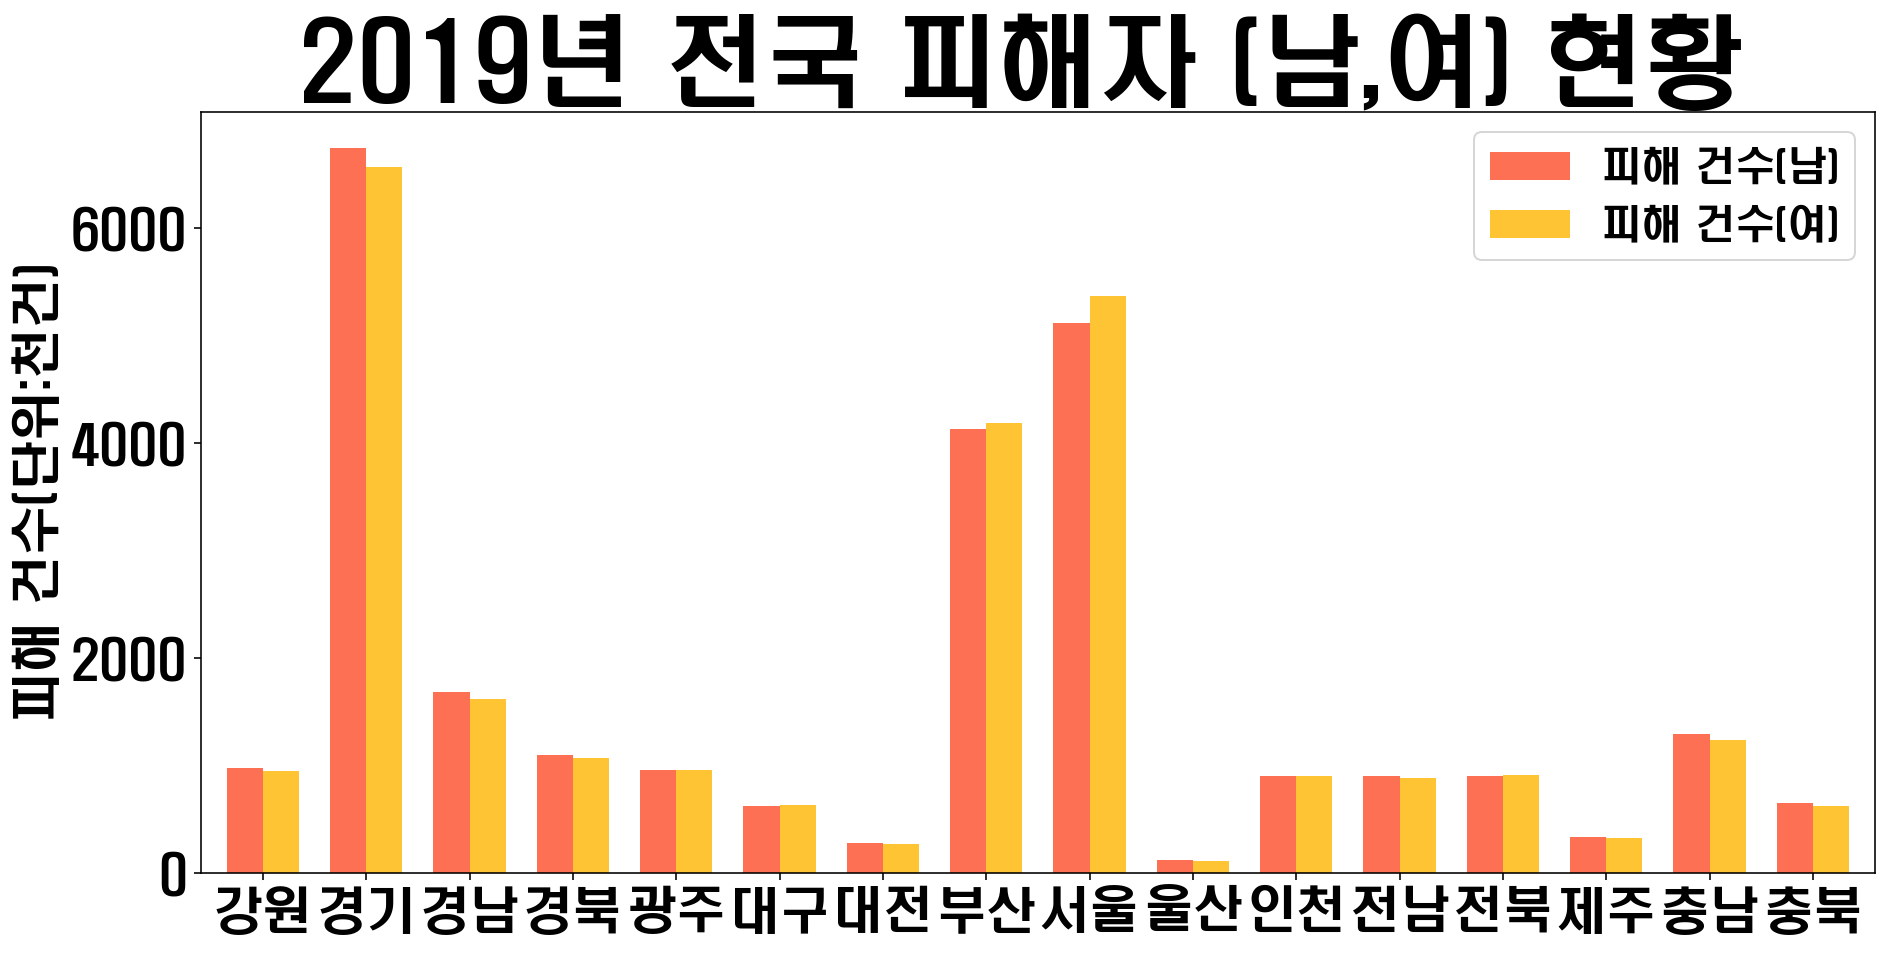

In [28]:
data_19_gender.plot(kind='bar',figsize=(15,7),fontsize=25,width=0.7)
plt.legend( borderaxespad=0.5,fontsize=20)  #bbox_to_anchor=(1.05, 1), loc=2,
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.xticks(rotation = 0 )
plt.title('2019년 전국 피해자 (남,여) 현황 ', fontsize=50)
plt.xlabel(' ')
plt.ylabel('피해 건수(단위:천건)', fontsize=25)
plt.savefig('2019년 전국 피해자 (남,여) 현황')

# CCTV

## 데이터 로드

In [29]:
sk_cctv= pd.read_excel('t_data/2019년_시도 범죄율 및 cctv개수.xlsx')

In [30]:
 sk_cctv=sk_cctv.groupby(['지역']).sum().sort_values(by=['범죄건수'],ascending=False)

## index 변경

In [31]:
sk_cctv.reset_index(inplace=True) 

## 컬럼명 확인하기

In [32]:
sk_cctv.columns

Index(['지역', '범죄건수', 'cctv개수'], dtype='object')

## 시각화

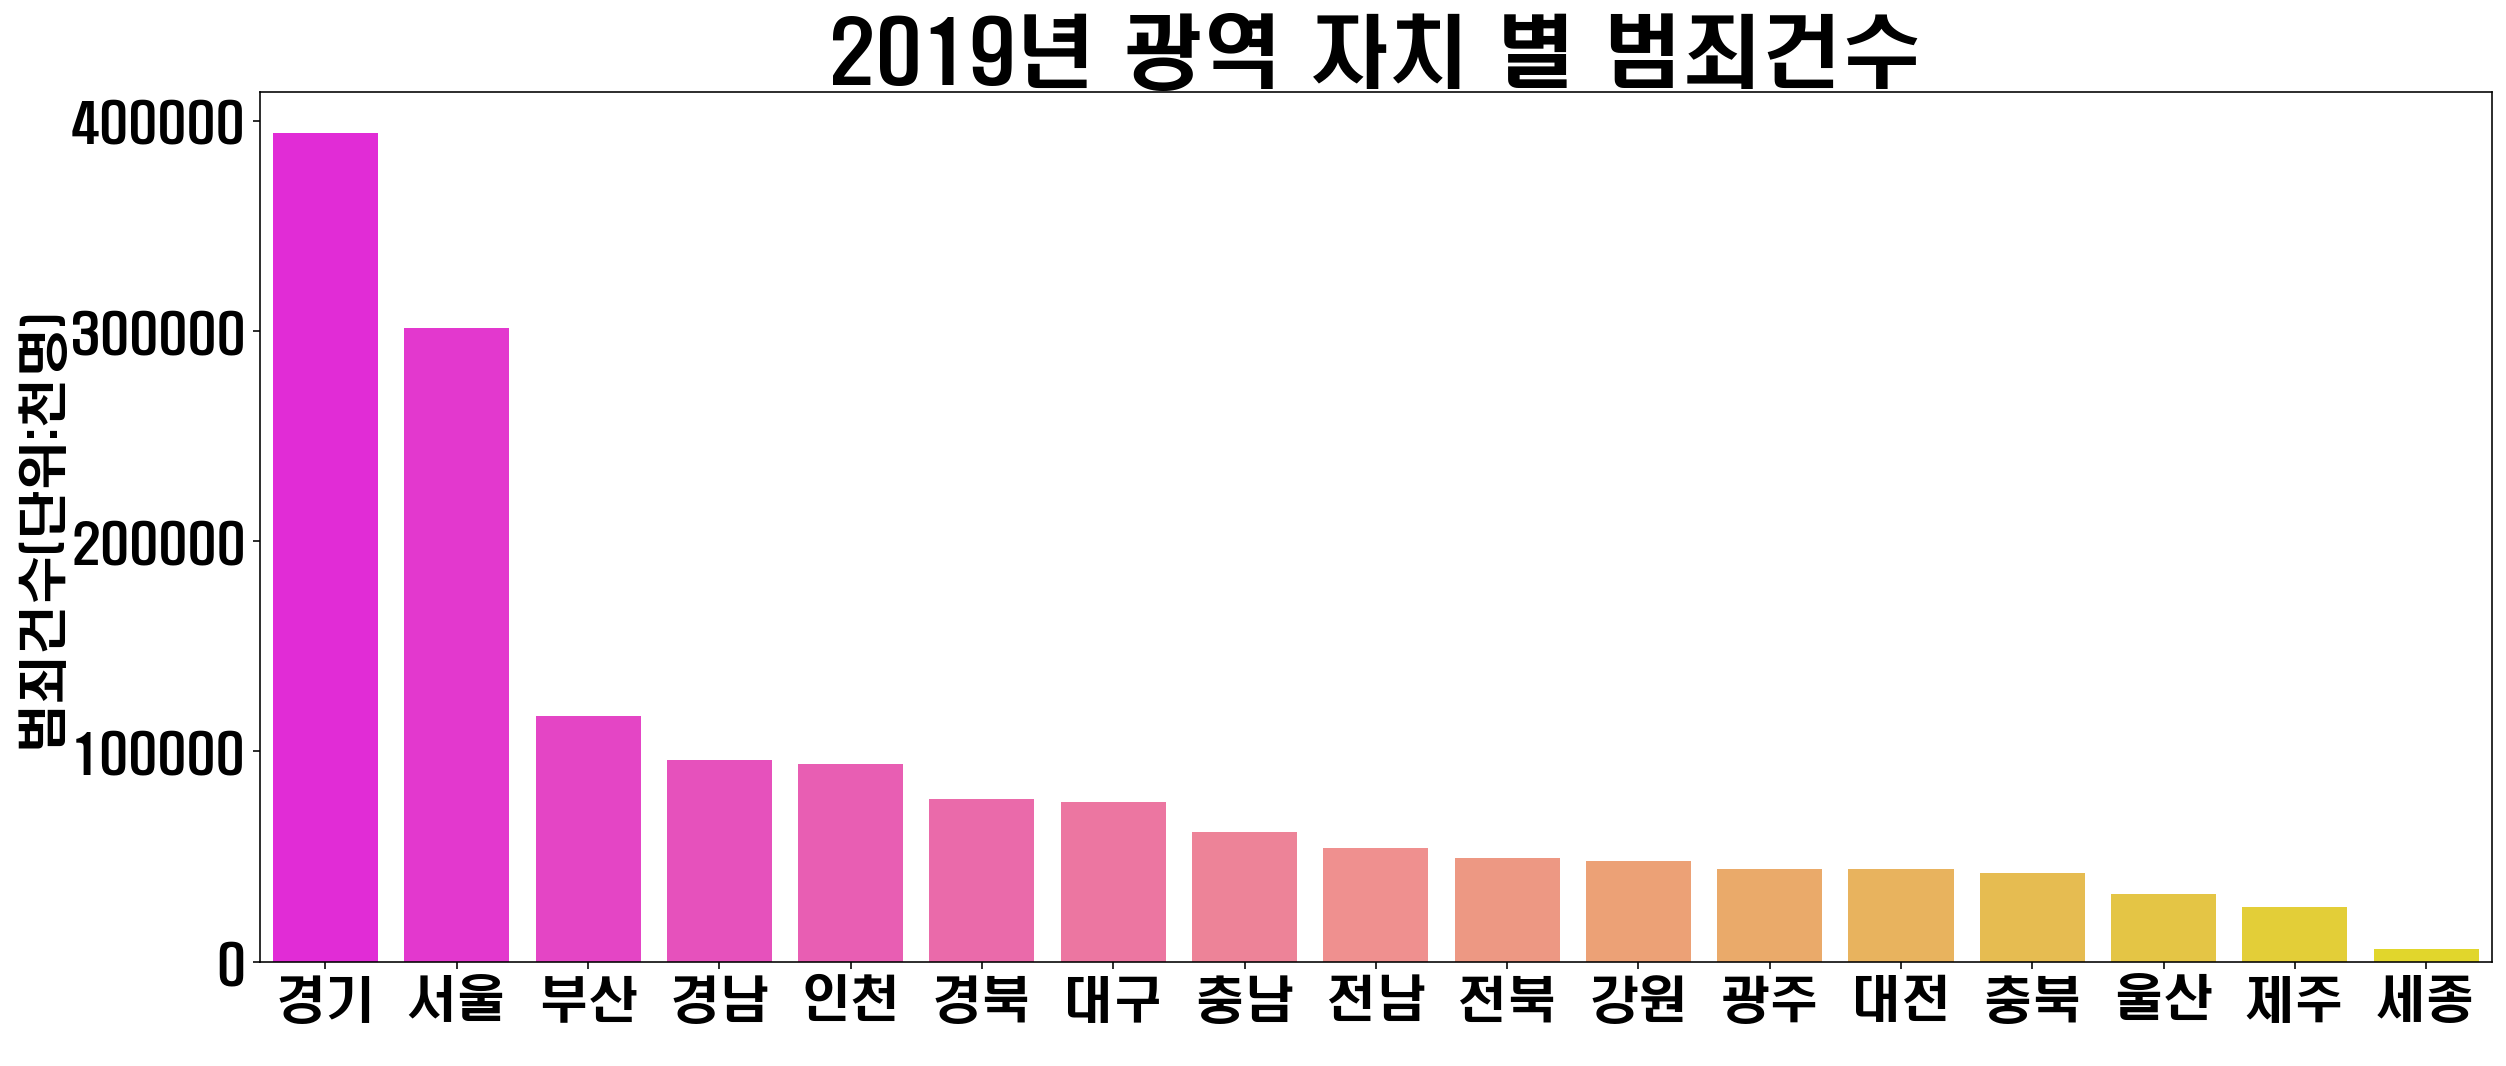

In [33]:
plt.figure(figsize=(20,8))
plt.title('2019년 광역 자치 별 범죄건수',fontsize=40)

ax=sns.barplot(x="지역",y="범죄건수",data=sk_cctv,palette='spring')
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
ax.set(xlabel=" ")
ax.set_ylabel('범죄건수(단위:천명)', fontsize=25)
plt.savefig('2019년 광역 자치 별 범죄건수')

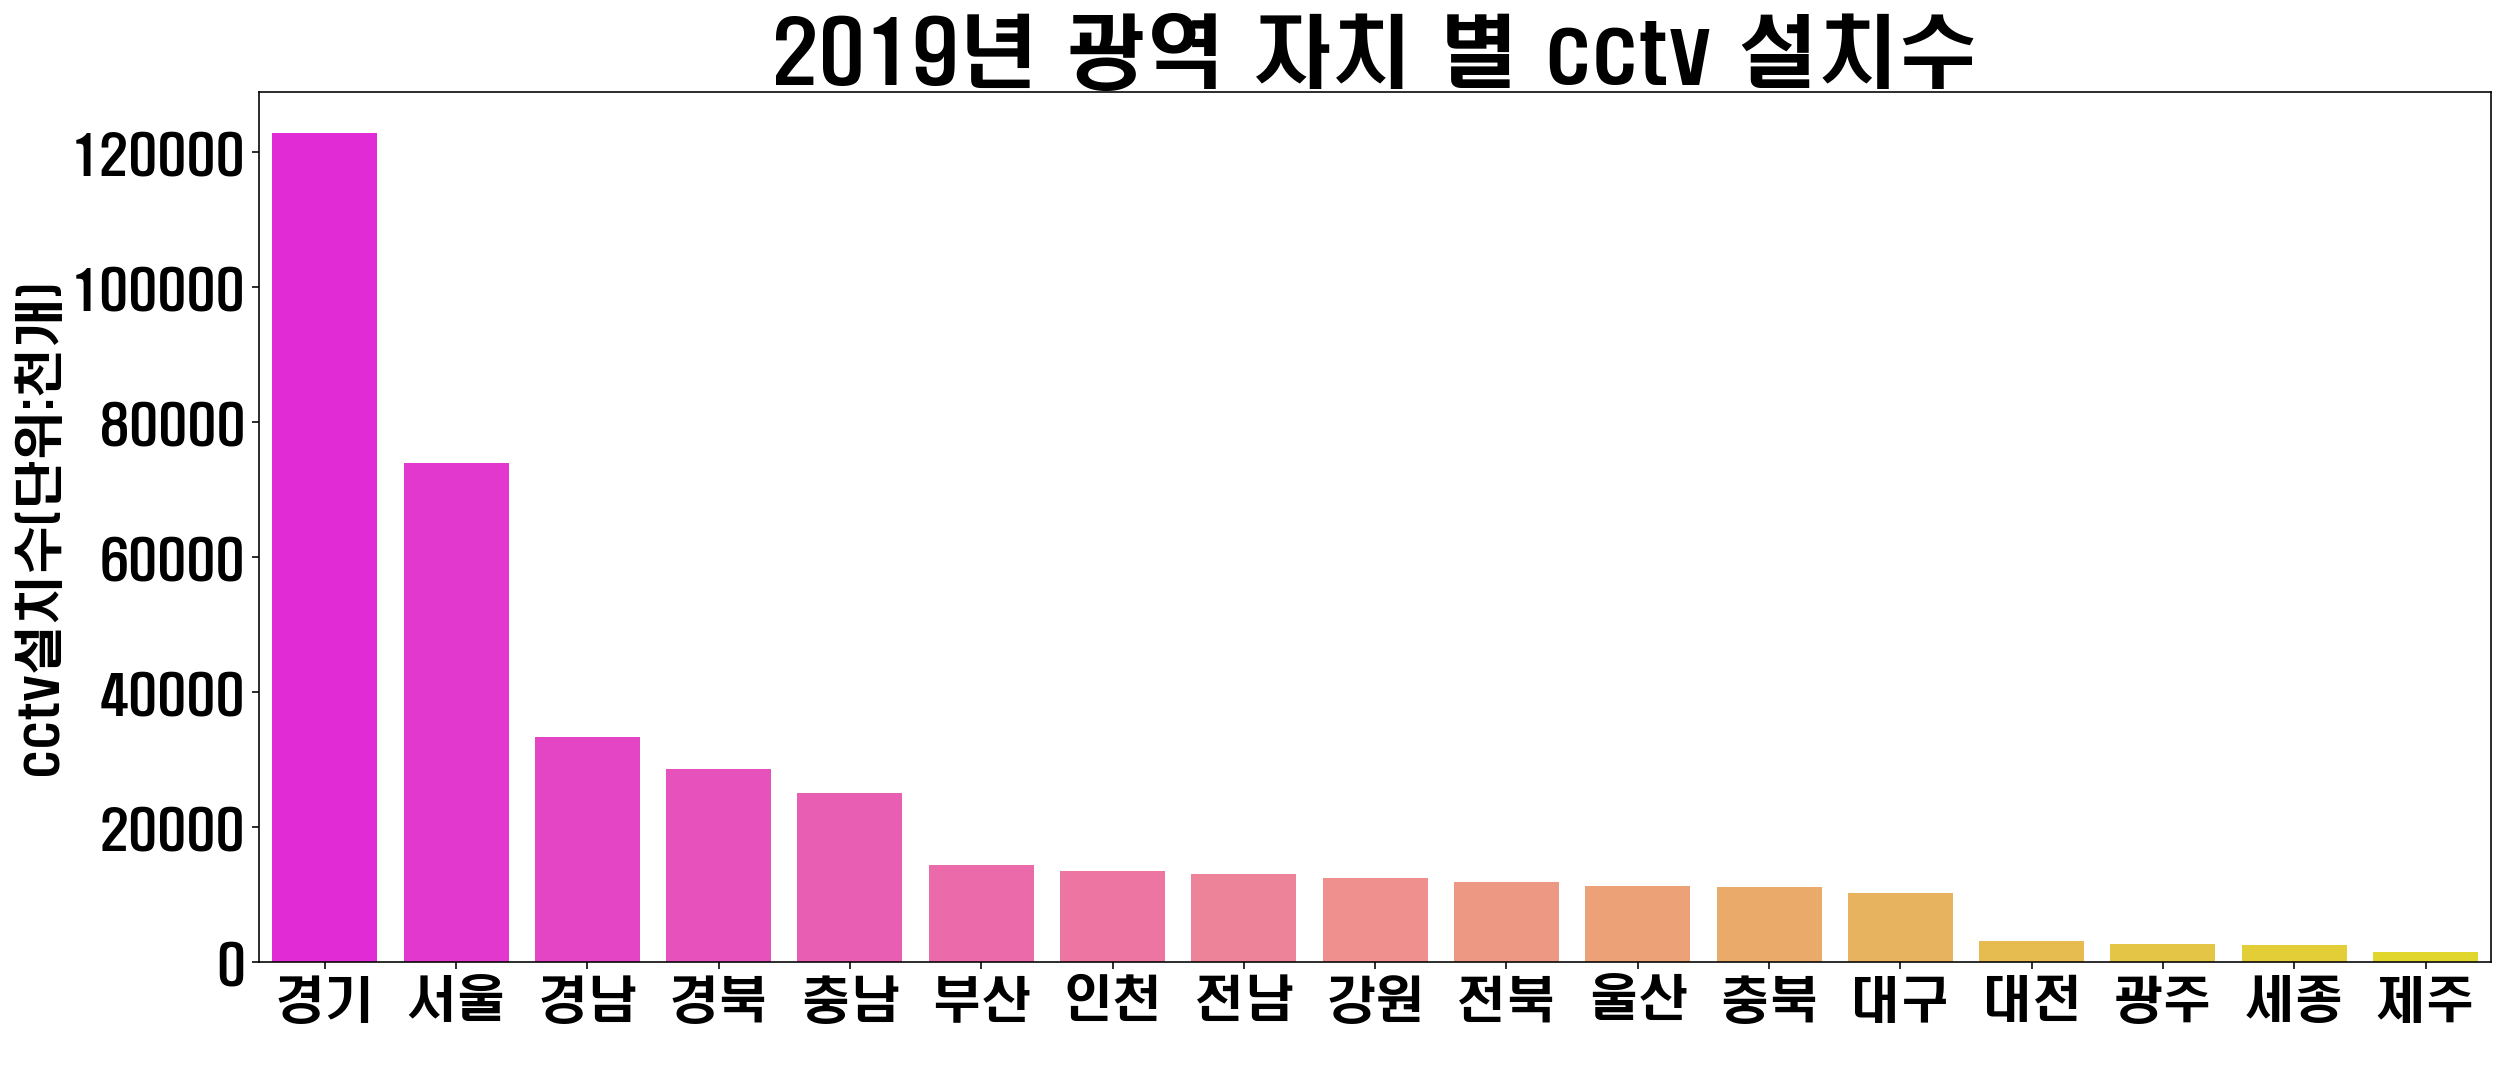

In [34]:
plt.figure(figsize=(20,8))
plt.title('2019년 광역 자치 별 cctv 설치수',fontsize=40)

ax1=sns.barplot(x="지역",y="cctv개수",data=sk_cctv, palette='spring',order=sk_cctv.sort_values('cctv개수',ascending=False).지역)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

ax1.set(xlabel=" ")
ax1.set_ylabel('cctv설치수(단위:천개)', fontsize=25)


plt.savefig('2019년 광역 자치 별 cctv 설치수')

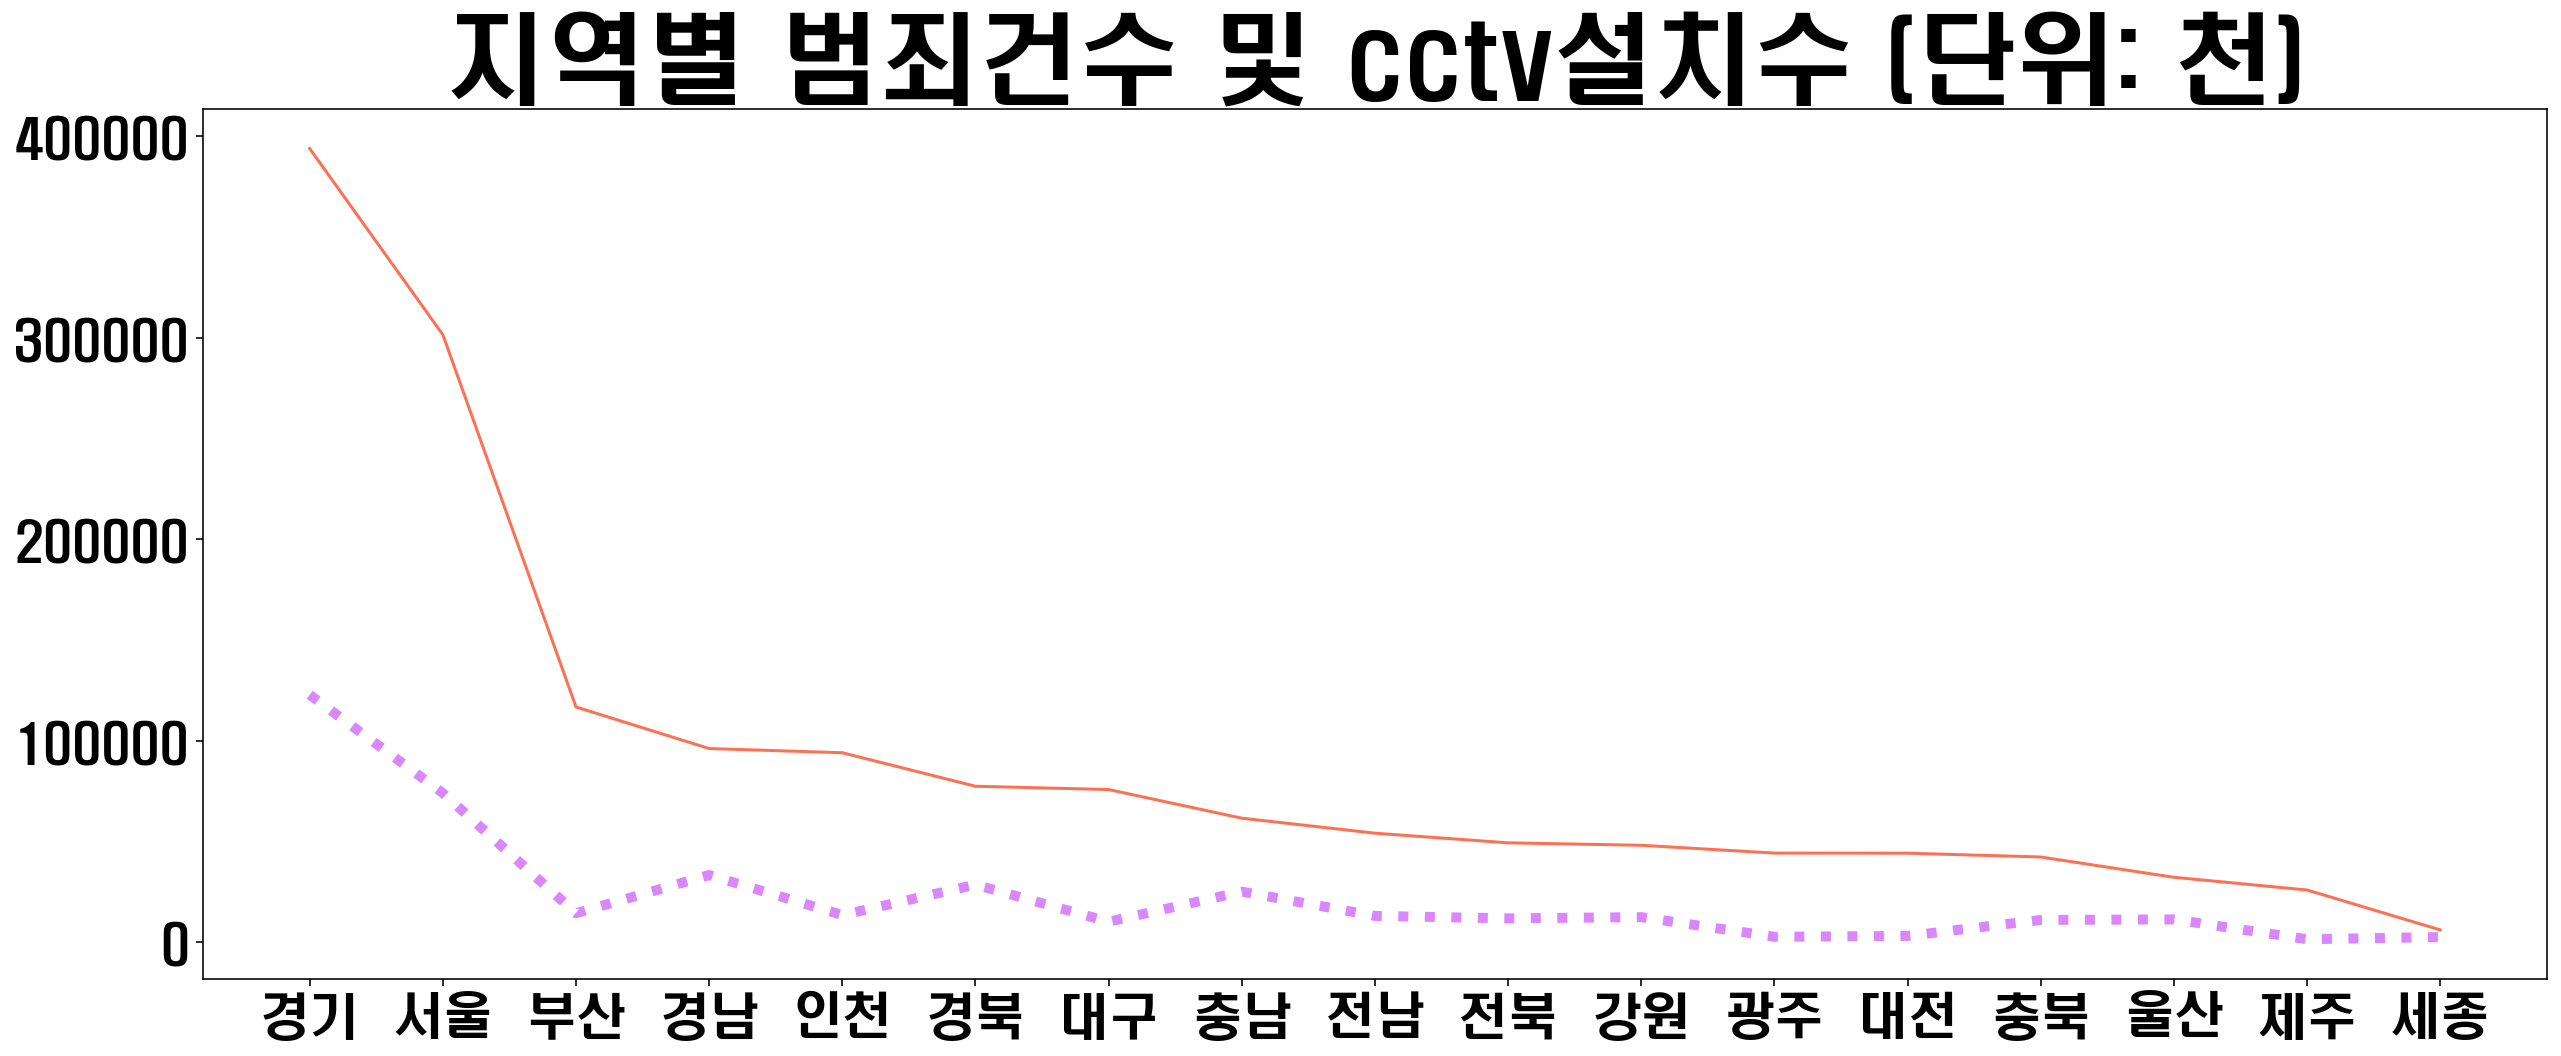

In [35]:
colors = ["#fe7054", "#fec434",'#da87ff','#ff9cd3' ]
customPalette = sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(21,8))
plt.title('지역별 범죄건수 및 cctv설치수 (단위: 천)', fontsize=50)


x_coordinates = sk_cctv["지역"]
y1_coordinates =sk_cctv['범죄건수']
y2_coordinates =sk_cctv['cctv개수']


line_crime=plt.plot(x_coordinates, y1_coordinates)
line_cctv=plt.plot(x_coordinates, y2_coordinates,ls='dotted', linewidth=5, color='#da87ff')


plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)


plt.savefig('지역별 범죄건수 및 cctv설치수.png')

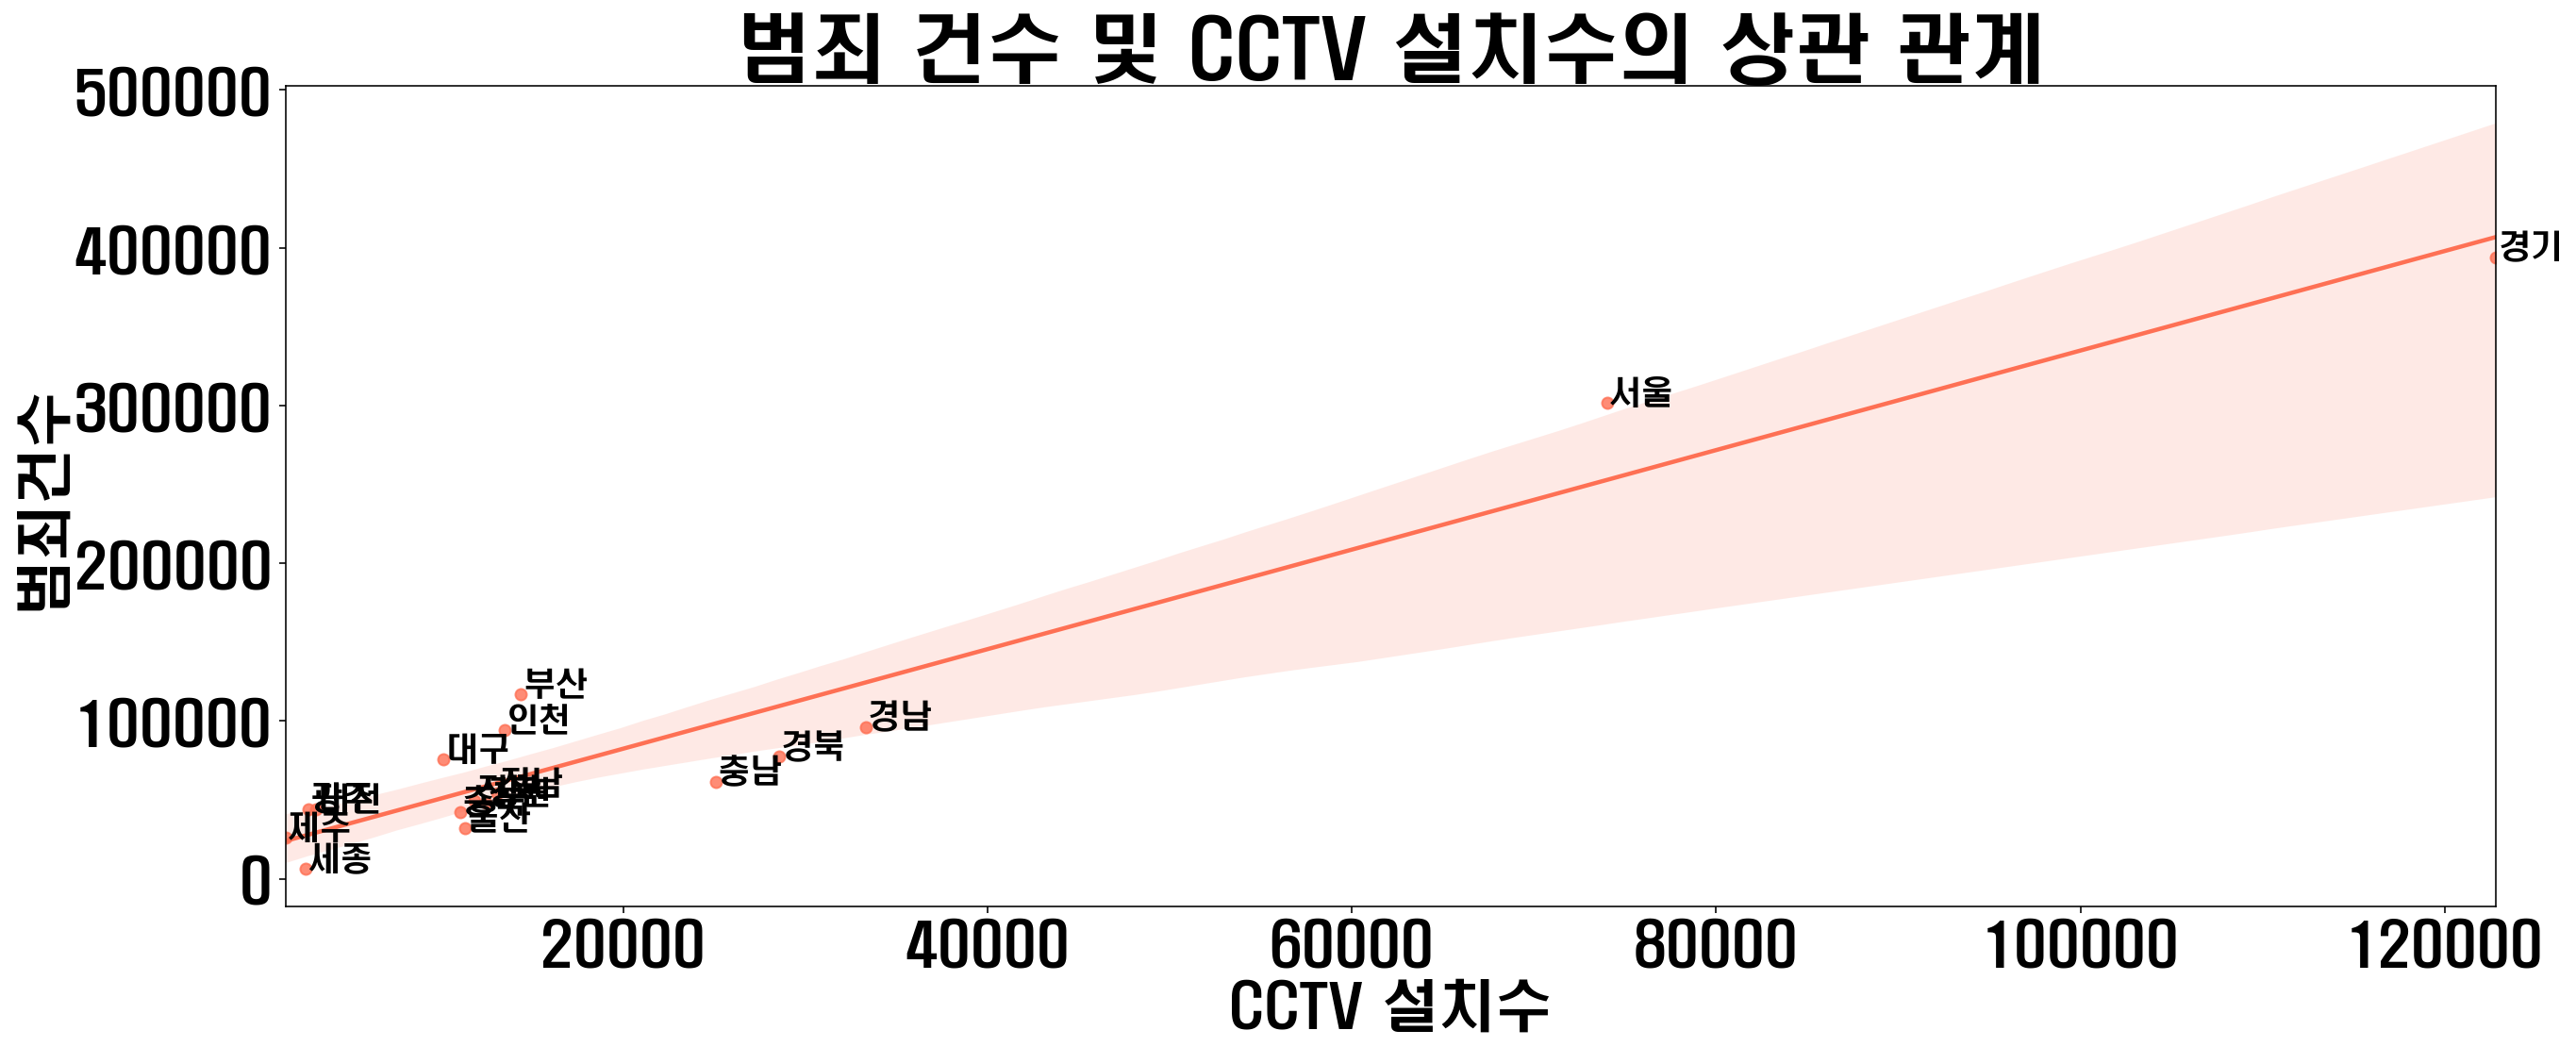

In [44]:
plt.figure(figsize=(21,8))
plt.title('범죄 건수 및 CCTV 설치수의 상관 관계', fontsize=40)

b=sns.regplot(data=sk_cctv, x='cctv개수',y='범죄건수')    

#plt.text(df_6341_max.가구수[0]-100, df_6341_max.범죄피해율[0], df_6341_max.기초[0], 
               #horizontalalignment='left', size='xx-large', color='black', weight='semibold')

#b.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
b.set_xlabel('CCTV 설치수', fontsize=30)
b.set_ylabel('범죄건수', fontsize=30)

for line in range(0,sk_cctv.shape[0]):
     plt.text(sk_cctv.cctv개수[line]+100, sk_cctv.범죄건수[line], sk_cctv.지역[line], 
              horizontalalignment='left', size='xx-large', color='black', weight='semibold')
        
plt.savefig('범죄 건수 및 CCTV 설치수의 상관 관계.png')